In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.interpolate import interp1d
from scipy.interpolate import griddata
from scipy.interpolate import SmoothBivariateSpline

In [2]:
# BENCHMARK POINTS DATA

# neutralino 1
mchi1 = np.array([133.6, 141. , 147.5, 152.7, 143.2, 151.7, 156.1, 161.9, 168.9,
       153.7, 160.5, 174.5, 180.6, 152.3, 162.2, 176.6, 185.1, 190.6,
       169.1, 179.8, 184.3, 194.7, 200.5, 179.1, 188.6, 193.3, 201.3,
       205.9, 210.5, 197.5, 205.8, 210.7, 215.7, 218.9, 213.3, 218.5,
       223.7, 228.8, 222.5, 227.9, 235.1, 240.3, 235.4, 239.2, 244.8,
       250.3, 244.8, 250.6, 254.5, 258.3, 262.1, 252.1, 256.1, 260.2,
       264.2, 268.2, 265.5, 271.8, 276. , 280.1])

# neutralino 2
mchi2 = np.array([158.5, 158.5, 158.5, 158.5, 173.8, 173.8, 173.8, 173.8, 173.8,
       184. , 184. , 184. , 184. , 194.2, 194.2, 194.2, 194.2, 194.2,
       204.4, 204.4, 204.4, 204.4, 204.4, 214.5, 214.5, 214.5, 214.5,
       214.5, 214.5, 224.7, 224.7, 224.7, 224.7, 224.7, 234.8, 234.8,
       234.8, 234.8, 245. , 245. , 245. , 245. , 255.1, 255.1, 255.1,
       255.1, 265.2, 265.2, 265.2, 265.2, 265.2, 275.3, 275.3, 275.3,
       275.3, 275.3, 285.4, 285.4, 285.4, 285.4])

# neutralino 3
mchi3 = np.array([164.8, 164.8, 164.8, 164.8, 180.2, 180.2, 180.3, 180.3, 180.6,
                 190.4, 190.4, 190.6, 190.9, 200.55, 200.6, 200.7, 200.7, 200.7,
                 210.8, 210.8, 210.8, 210.8, 211.3, 221.0, 221.0, 221.0, 221.0,
                 221.0, 221.0, 231.2, 231.3, 231.3, 231.5, 231.5, 241.5, 241.6,
                 241.7, 241.8, 251.7, 251.7, 251.7, 252.1, 261.9, 262.0, 262.0,
                 262.3, 272.1, 272.1, 272.2, 272.4, 272.6, 282.3, 282.3, 282.3, 
                 282.4, 282.5, 292.5, 292.6, 292.6, 292.8
                 ])

# chargino 1
mcha1 = np.array([161.8, 161.8, 161.8, 161.8, 177.2, 177.2, 177.2, 177.2, 177.2,
                  187.5, 187.5, 187.5, 187.5, 197.7, 197.7, 197.7, 197.7, 197.7,
                  208.0, 208.0, 208.0, 208.0, 208.0, 218.2, 218.2, 218.2, 218.2,
                  218.2, 218.2, 228.4, 228.4, 228.4, 228.4, 228.4, 238.6, 238.6, 
                  238.6, 238.6, 248.9, 248.9, 248.9, 248.9, 259.1, 259.1, 259.1, 
                  259.1, 269.3, 269.3, 269.3, 269.3, 269.3, 279.5, 279.5, 279.5,
                  279.5, 279.5, 289.7, 289.7, 289.7, 289.7
                 ])

sigma_SI = np.array([2.50e-49, 6.50e-49, 1.30e-48, 2.26e-48, 2.20e-49, 6.20e-49,
       9.90e-49, 1.92e-48, 3.99e-48, 3.95e-49, 7.30e-49, 2.76e-48,
       5.10e-48, 2.25e-49, 4.70e-49, 1.50e-48, 3.40e-48, 5.60e-48,
       4.70e-49, 9.70e-49, 1.40e-48, 3.50e-48, 5.96e-48, 5.50e-49,
       1.00e-48, 1.40e-48, 2.70e-48, 4.10e-48, 6.30e-48, 1.00e-48,
       1.80e-48, 2.70e-48, 4.10e-48, 5.60e-48, 1.60e-48, 2.30e-48,
       3.60e-48, 5.70e-48, 1.60e-48, 2.30e-48, 4.20e-48, 6.80e-48,
       2.02e-48, 2.64e-48, 4.20e-48, 6.70e-48, 2.00e-48, 3.00e-48,
       4.10e-48, 5.80e-48, 8.10e-48, 1.70e-48, 2.20e-48, 3.00e-48,
       4.10e-48, 5.80e-48, 2.20e-48, 3.40e-48, 4.80e-48, 7.00e-48])

relic = np.array([7.50e+00, 9.00e-01, 1.00e-02, 2.80e-02, 1.38e+01, 2.96e+00,
       5.50e-01, 1.10e-01, 2.44e-02, 1.16e+01, 3.45e+00, 7.00e-02,
       1.80e-02, 5.33e+01, 1.35e+01, 3.60e-01, 5.80e-02, 2.00e-02,
       1.88e+01, 2.70e+00, 5.60e-01, 6.35e-02, 2.00e-02, 1.67e+01,
       2.85e+00, 6.20e-01, 1.20e-01, 5.20e-02, 2.30e-02, 3.10e+00,
       3.40e-01, 1.34e-01, 5.70e-02, 3.30e-02, 4.70e-01, 1.90e-01,
       8.10e-02, 8.10e-02, 5.10e-01, 2.10e-01, 7.00e-02, 3.00e-02,
       3.00e-01, 1.70e-01, 7.00e-02, 3.00e-02, 3.20e-01, 1.30e-01,
       7.70e-02, 4.50e-02, 2.60e-02, 4.70e-01, 2.60e-01, 1.40e-01,
       8.30e-02, 4.80e-02, 2.70e-01, 1.17e-01, 6.70e-02, 4.00e-02])

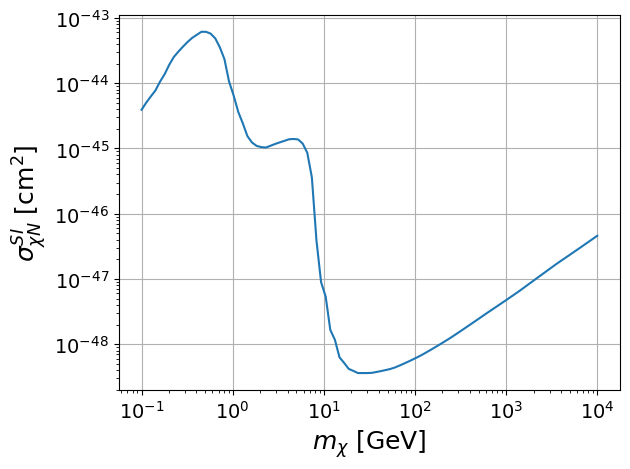

In [3]:
################
# NEUTRINO FOG # (https://arxiv.org/pdf/2109.03116)
################

# m[GeV]     SI DM-nuecleon cross-section [cm**2]
nufog = np.array([[1.00000000e-01, 3.92570544e-45],
       [1.40819255e-01, 7.58827590e-45],
       [1.78947432e-01, 1.37323851e-44],
       [2.27399183e-01, 2.56838490e-44],
       [3.46847646e-01, 4.80368189e-44],
       [4.61342841e-01, 6.25265405e-44],
       [5.47463043e-01, 6.04996874e-44],
       [6.27797560e-01, 5.13093815e-44],
       [7.28181836e-01, 3.45510729e-44],
       [9.04466462e-01, 1.09035290e-44],
       [1.08562264e+00, 4.19314857e-45],
       [1.37956548e+00, 1.66657433e-45],
       [1.69410196e+00, 1.12224956e-45],
       [2.22776398e+00, 1.01661294e-45],
       [3.03155195e+00, 1.19870409e-45],
       [4.31799821e+00, 1.41341057e-45],
       [5.42488437e+00, 1.36759362e-45],
       [6.43756321e+00, 9.51772374e-46],
       [7.13378669e+00, 5.08884195e-46],
       [7.63928174e+00, 2.16035906e-46],
       [7.63928174e+00, 6.38276632e-47],
       [9.06532854e+00, 9.75588219e-48],
       [1.16520510e+01, 1.70125428e-48],
       [1.48069567e+01, 6.33039963e-49],
       [1.81828951e+01, 4.26280911e-49],
       [2.33712458e+01, 3.61525999e-49],
       [3.25378238e+01, 3.61525999e-49],
       [5.69119114e+01, 4.26280911e-49],
       [1.16786719e+02, 6.76166526e-49],
       [2.47999012e+02, 1.26464258e-48],
       [6.32110296e+02, 3.07873347e-48],
       [1.40498265e+03, 6.56948471e-48],
       [3.70578381e+03, 1.76550686e-47],
       [1.00000000e+04, 4.59088320e-47]])

# INTERPOLATE THE NEUTRINO FOG
sigma_nufog = interp1d(nufog[:,0], nufog[:,1], bounds_error=False, fill_value="extrapolate")



# PLOT
m_range = np.logspace(-1, 4, 100)
nufog_cross = [sigma_nufog(m) for m in m_range]

plt.plot(m_range, nufog_cross)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('$m_{\chi}$ [GeV]', fontsize=18)
plt.ylabel('$\sigma_{\chi N}^{SI}$ [cm$^2$]', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
##################################
# BPs Effective SI cross section # (considering the relic density)
##################################

# sigma_eff = sigma_SI * (relic / 0.12)
sigma_eff = np.zeros(len(relic))

for i_rel in range(len(relic)):
    if relic[i_rel] > 0.12:
        sigma_eff[i_rel] = sigma_SI[i_rel]
    else:
        sigma_eff[i_rel] = sigma_SI[i_rel] * (relic[i_rel] / 0.12)

## n2 - n1

min y axis value:  3.099999999999966


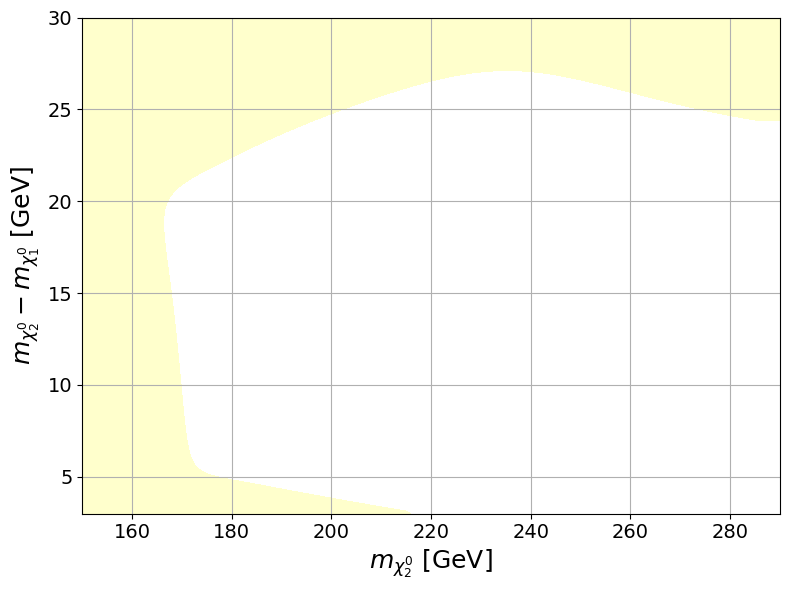

In [15]:
#########################
# CONTOUR PLOTS, LEVELS # (compare BPs cross section with neutrino fog)
#########################

x = mchi2            # x axis
y = mchi2 - mchi1    # y axis
# z is the BP cross-section - nu fog cross section. We want level z=0
z = np.log10(sigma_eff) - np.log10(sigma_nufog(mchi1)) # log diff, easier to interpolate

print('min y axis value: ', min(y))

# Grid to interpolate
xi = np.linspace(150, 300, 300)
yi = np.linspace(3, 45, 300)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
zi_nufog = griddata((x, y), z, (xi, yi), method='cubic')



##########
# SMOOTH #
##########

# let's smooth it with spline
spline = SmoothBivariateSpline(x, y, z, s=0.25)  # parameter s controls the smoothness
zi_nufog_smooth = spline.ev(xi, yi)

zi_nufog_smooth[(xi < 170) & (yi < 5)] = np.min(zi_nufog_smooth)





########
# Plot #
########

plt.figure(figsize=(8, 6))

plt.contourf(xi, yi, zi_nufog_smooth, levels=[np.min(zi_nufog_smooth), 0], colors=['yellow'], alpha=0.2)

plt.xlim(150,290)
plt.ylim(3,30)
plt.xlabel('$m_{\\chi_2^0}$ [GeV]', fontsize=18)
plt.ylabel('$m_{\\chi_2^0} - m_{\\chi_1^0}$ [GeV]', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.show()

## [ (n3 - n1) + (n2 - n1) ] /2

min y axis value:  6.799999999999983


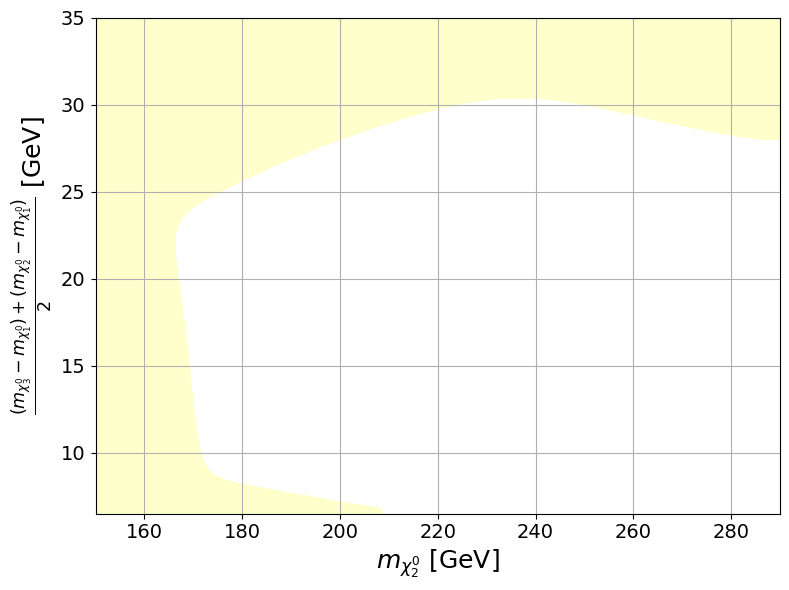

In [28]:
#########################
# CONTOUR PLOTS, LEVELS # (compare BPs cross section with neutrino fog)
#########################

x = mchi2            # x axis
y = ( (mchi3 - mchi1) + (mchi2 - mchi1) ) /2    # y axis
# z is the BP cross-section - nu fog cross section. We want level z=0
z = np.log10(sigma_eff) - np.log10(sigma_nufog(mchi1)) # log diff, easier to interpolate

print('min y axis value: ', min(y))

# Grid to interpolate
xi = np.linspace(150, 300, 300)
yi = np.linspace(3, 45, 300)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
zi_nufog = griddata((x, y), z, (xi, yi), method='cubic')



##########
# SMOOTH #
##########

# let's smooth it with spline
spline = SmoothBivariateSpline(x, y, z, s=0.25)  # parameter s controls the smoothness
zi_nufog_smooth = spline.ev(xi, yi)

zi_nufog_smooth[(xi < 170) & (yi < 8)] = np.min(zi_nufog_smooth)





########
# Plot #
########

plt.figure(figsize=(8, 6))

plt.contourf(xi, yi, zi_nufog_smooth, levels=[np.min(zi_nufog_smooth), 0], colors=['yellow'], alpha=0.2)

plt.xlim(150,290)
plt.ylim(6.5,35)
plt.xlabel('$m_{\\chi_2^0}$ [GeV]', fontsize=18)
plt.ylabel('$\\frac{(m_{\\chi_3^0} - m_{\\chi_1^0}) + (m_{\\chi_2^0} - m_{\\chi_1^0} )}{2}$ [GeV]', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.show()

## [ (n3 - n2) + (n2 - n1) ] /2  -----  o lo que es igual --------  ( m3 - m1 ) /2

min y axis value:  5.049999999999997


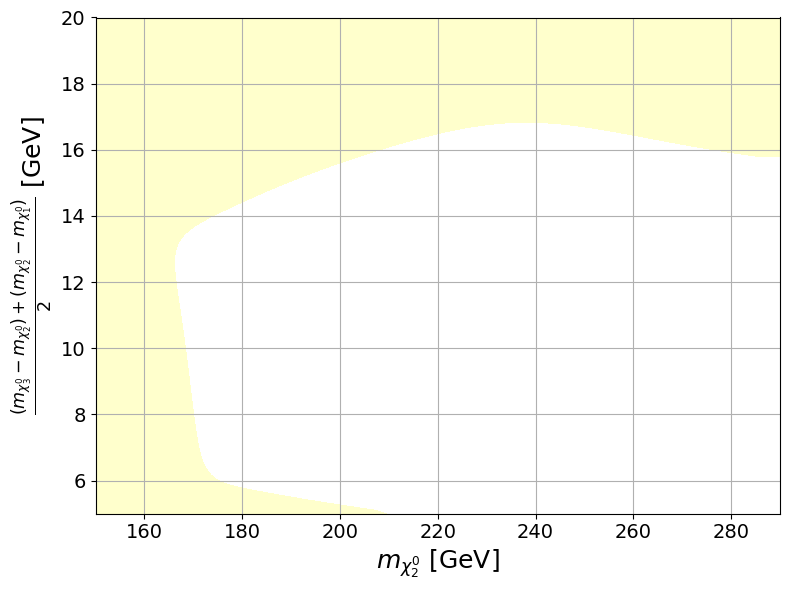

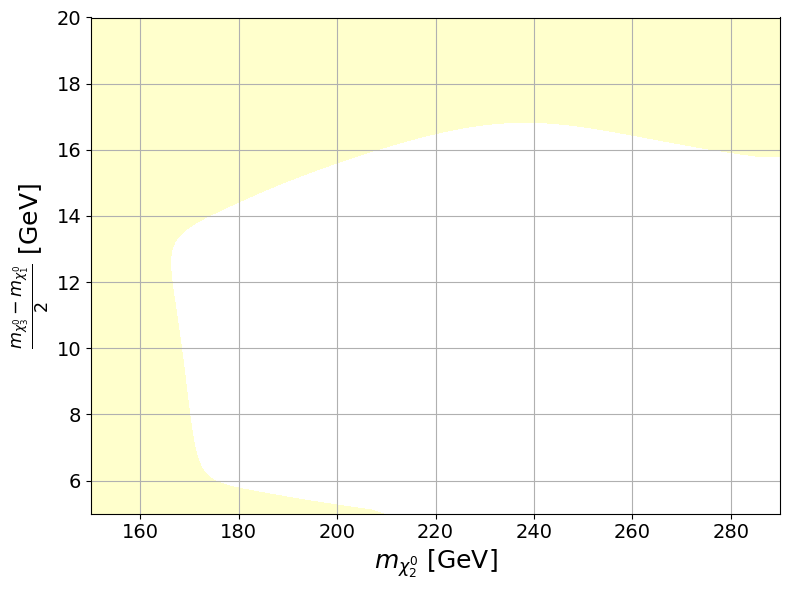

In [31]:
#########################
# CONTOUR PLOTS, LEVELS # (compare BPs cross section with neutrino fog)
#########################

x = mchi2            # x axis
y = ( mchi3 - mchi1 ) / 2   # y axis
# z is the BP cross-section - nu fog cross section. We want level z=0
z = np.log10(sigma_eff) - np.log10(sigma_nufog(mchi1)) # log diff, easier to interpolate

print('min y axis value: ', min(y))

# Grid to interpolate
xi = np.linspace(150, 300, 300)
yi = np.linspace(3, 45, 300)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
zi_nufog = griddata((x, y), z, (xi, yi), method='cubic')



##########
# SMOOTH #
##########

# let's smooth it with spline
spline = SmoothBivariateSpline(x, y, z, s=0.25)  # parameter s controls the smoothness
zi_nufog_smooth = spline.ev(xi, yi)

zi_nufog_smooth[(xi < 170) & (yi < 6)] = np.min(zi_nufog_smooth)





########
# Plot #
########

plt.figure(figsize=(8, 6))

plt.contourf(xi, yi, zi_nufog_smooth, levels=[np.min(zi_nufog_smooth), 0], colors=['yellow'], alpha=0.2)

plt.xlim(150,290)
plt.ylim(5,20)
plt.xlabel('$m_{\\chi_2^0}$ [GeV]', fontsize=18)
plt.ylabel('$\\frac{(m_{\\chi_3^0} - m_{\\chi_2^0}) + (m_{\\chi_2^0} - m_{\\chi_1^0} )}{2}$ [GeV]', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))

plt.contourf(xi, yi, zi_nufog_smooth, levels=[np.min(zi_nufog_smooth), 0], colors=['yellow'], alpha=0.2)

plt.xlim(150,290)
plt.ylim(5,20)
plt.xlabel('$m_{\\chi_2^0}$ [GeV]', fontsize=18)
plt.ylabel('$\\frac{m_{\\chi_3^0} - m_{\\chi_1^0}}{2}$ [GeV]', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.show()

## chargino1- n1

min y axis value:  6.900000000000006


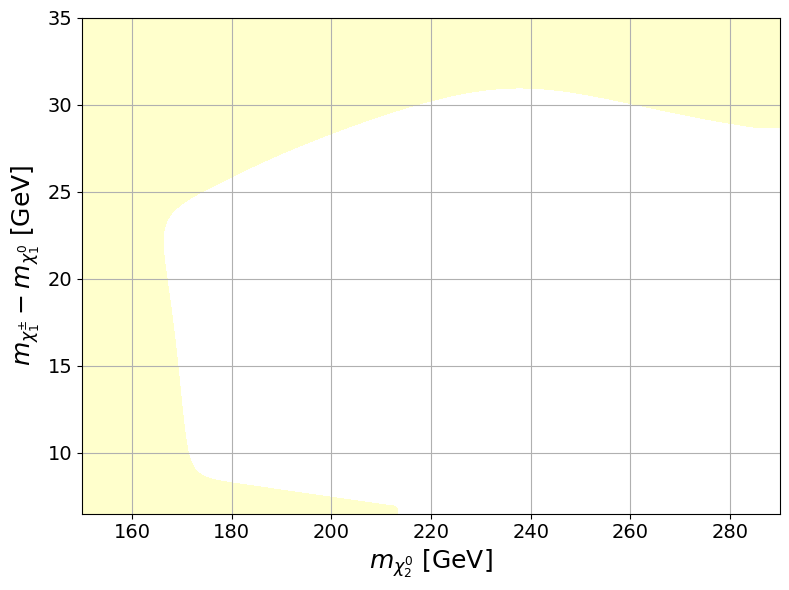

In [23]:
#########################
# CONTOUR PLOTS, LEVELS # (compare BPs cross section with neutrino fog)
#########################

x = mchi2            # x axis
y = mcha1 - mchi1    # y axis
# z is the BP cross-section - nu fog cross section. We want level z=0
z = np.log10(sigma_eff) - np.log10(sigma_nufog(mchi1)) # log diff, easier to interpolate

print('min y axis value: ', min(y))

# Grid to interpolate
xi = np.linspace(150, 300, 300)
yi = np.linspace(3, 45, 300)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
zi_nufog = griddata((x, y), z, (xi, yi), method='cubic')



##########
# SMOOTH #
##########

# let's smooth it with spline
spline = SmoothBivariateSpline(x, y, z, s=0.25)  # parameter s controls the smoothness
zi_nufog_smooth = spline.ev(xi, yi)

zi_nufog_smooth[(xi < 170) & (yi < 8)] = np.min(zi_nufog_smooth)





########
# Plot #
########

plt.figure(figsize=(8, 6))

plt.contourf(xi, yi, zi_nufog_smooth, levels=[np.min(zi_nufog_smooth), 0], colors=['yellow'], alpha=0.2)

plt.xlim(150,290)
plt.ylim(6.5,35)
plt.xlabel('$m_{\\chi_2^0}$ [GeV]', fontsize=18)
plt.ylabel('$m_{\\chi_1^{\\pm}} - m_{\\chi_1^0}$ [GeV]', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.show()